In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [30]:
data=pd.read_csv("/content/Train_churn.csv")

In [31]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [32]:
data.shape

(6650, 11)

In [33]:
data.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

In [81]:
data['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [83]:
data.isnull().any()

ID                    False
Age                   False
Gender                False
Income                False
Balance               False
Vintage               False
Transaction_Status    False
Product_Holdings      False
Credit_Card           False
Credit_Category       False
Is_Churn              False
dtype: bool

In [84]:
data.corr()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.002154,0.017353,0.032166,0.012089,0.204301
Balance,0.002154,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017353,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.032166,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.012089,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204301,0.056380,0.020152,-0.086917,-0.000848,1.000000


Preprocessing

In [85]:
X=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [86]:
y.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [87]:
X

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor
4,39,Female,More than 15L,893146.23,1,1,1,1,Good
...,...,...,...,...,...,...,...,...,...
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor
6648,66,Female,10L - 15L,395233.65,3,0,2,1,Poor


In [88]:
y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

In [89]:
y.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [90]:
X['Product_Holdings']=X['Product_Holdings'].replace('3+',3)
X['Product_Holdings']=pd.to_numeric(X['Product_Holdings'])
X['Product_Holdings'].value_counts()

1    3200
2    3182
3     268
Name: Product_Holdings, dtype: int64

Splitting the dataset

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [138]:
y_train.value_counts()

0    4090
1    1230
Name: Is_Churn, dtype: int64

In [109]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5320, 9) (1330, 9) (5320,) (1330,)


In [110]:
X.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int64
Credit_Card             int64
Credit_Category        object
dtype: object

In [111]:
X['Gender'].value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [112]:
le=LabelEncoder()
X_train['Gender']=le.fit_transform(X_train['Gender'])
X_test['Gender']=le.transform(X_test['Gender'])

In [113]:
col_ohe=[col for col in X.columns if X_train[col].dtypes=='object']
col_ohe

['Income', 'Credit_Category']

In [114]:
ohe=OneHotEncoder(handle_unknown='ignore')
train_enc=ohe.fit_transform(X_train[col_ohe]).toarray()
test_enc=ohe.transform(X_test[col_ohe]).toarray()

In [115]:
items=ohe.categories_
cols=[]
for c in items:
  cols.extend(c)
cols

['10L - 15L',
 '5L - 10L',
 'Less than 5L',
 'More than 15L',
 'Average',
 'Good',
 'Poor']

In [116]:
train_enc_df=pd.DataFrame(train_enc,columns=cols,index=X_train.index)
test_enc_df=pd.DataFrame(test_enc,columns=cols,index=X_test.index)

In [117]:
X_train=X_train.drop(col_ohe,axis=1)
X_test=X_test.drop(col_ohe,axis=1)

In [118]:
X_train=pd.concat([X_train,train_enc_df],axis=1)
X_test=pd.concat([X_test,test_enc_df],axis=1)

Standardization

In [119]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

Min max scaler

In [28]:
# mms=MinMaxScaler()
# X_train_mms=mms.fit_transform(X_train)
# X_test_mms=mms.transform(X_test)

K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=42)

In [ ]:
scores=cross_val_score(clf,X_train_mms,y_train,cv=100)
scores

Model

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train_mms,y_train)
test_pred=log_reg.predict(X_test_mms)
print("Accuracy : ",accuracy_score(y_test,test_pred))

Accuracy :  0.7646616541353384


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_mms,y_train)
test_pred_rf=rf.predict(X_test_mms)
print("Accuracy : ",accuracy_score(y_test,test_pred_rf))

Accuracy :  0.7563909774436091


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train_mms,y_train)
test_pred_dt=dt.predict(X_test_mms)
print("Accuracy : ",accuracy_score(y_test,test_pred_dt))

Accuracy :  0.6481203007518797


GridSearchCV on SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
params={'C':[1,10,50,100,200,500,1000],'kernel':['linear','rbf','sigmoid']}
svc=svm.SVC()
clf=GridSearchCV(svc,params)
clf.fit(X_train_mms,y_train)
clf.best_score_

0.768796992481203

In [63]:
X_train_ss

array([[ 0.91040624,  0.91870605,  0.58349632, ...,  1.51194544,
        -0.55100096, -0.92813877],
       [-0.0143111 ,  0.91870605, -1.35790673, ..., -0.66139953,
        -0.55100096,  1.0774251 ],
       [ 0.70491349, -1.08848745,  0.83676161, ..., -0.66139953,
         1.81487887, -0.92813877],
       ...,
       [-0.32255021, -1.08848745, -0.4999646 , ..., -0.66139953,
        -0.55100096,  1.0774251 ],
       [-0.63078933,  0.91870605, -1.12408438, ..., -0.66139953,
         1.81487887, -0.92813877],
       [-1.04177481,  0.91870605,  0.86598666, ..., -0.66139953,
        -0.55100096,  1.0774251 ]])

ANN

In [126]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])


In [127]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [139]:
trained_model=model.fit(X_train_ss,y_train,validation_data=(X_test_ss,y_test),epochs=20)

Epoch 1/20
167/167 [==============================] - 1s 4ms/step - loss: 0.3772 - accuracy: 0.8318 - val_loss: 0.6602 - val_accuracy: 0.7376
Epoch 2/20
167/167 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8280 - val_loss: 0.6669 - val_accuracy: 0.7218
Epoch 3/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8325 - val_loss: 0.6670 - val_accuracy: 0.7203
Epoch 4/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8284 - val_loss: 0.6709 - val_accuracy: 0.7211
Epoch 5/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8314 - val_loss: 0.6757 - val_accuracy: 0.7233
Epoch 6/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8346 - val_loss: 0.6692 - val_accuracy: 0.7301
Epoch 7/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8301 - val_loss: 0.6845 - val_accuracy: 0.7406
Epoch 

In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                240       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,961
Trainable params: 2,961
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.evaluate(X_test,y_test)
print("Testing accuracy :",model.evaluate(X_test,y_test)[1])
print("Testing loss :",model.evaluate(X_test,y_test)[0])

42/42 [==============================] - 0s 2ms/step - loss: 136541.1406 - accuracy: 0.7692
Testing accuracy : 0.7691729068756104
42/42 [==============================] - 0s 2ms/step - loss: 136541.1406 - accuracy: 0.7692
Testing loss : 136541.140625


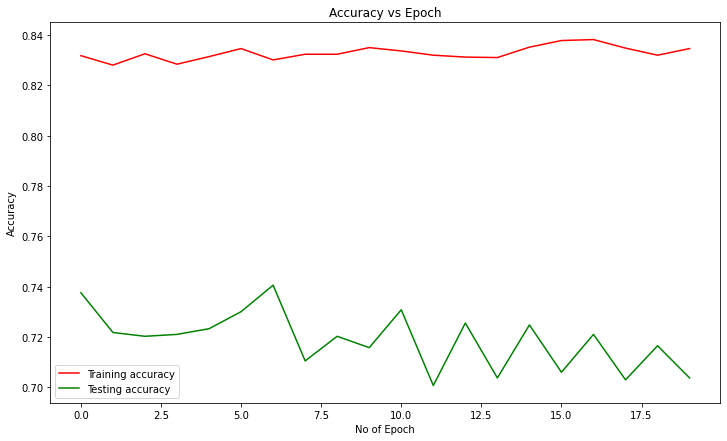

In [142]:
plt.figure(figsize=(12,7))
plt.plot(trained_model.history['accuracy'],label='Training accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Epoch")
plt.show()


In [135]:
y_pred_prob=model.predict(X_test_ss)
y_pred=np.where(y_pred_prob>0.5,1,0)

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1023
           1       0.32      0.18      0.23       307

    accuracy                           0.72      1330
   macro avg       0.55      0.53      0.53      1330
weighted avg       0.68      0.72      0.69      1330

[[906 117]
 [251  56]]


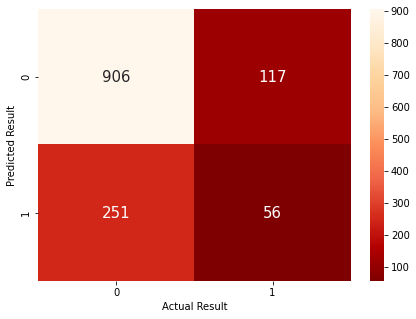

In [137]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,
            annot_kws={"fontsize":15})
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.show()

In [143]:
y_train.value_counts()

0    4090
1    1230
Name: Is_Churn, dtype: int64

In [145]:
from imblearn.datasets import make_imbalance
X_train_bal, y_train_bal = make_imbalance(X_train_ss, y_train, sampling_strategy={0: 1500, 1: 1230},random_state=14)


In [147]:
trained_model_bal=model.fit(X_train_bal,y_train_bal,validation_data=(X_test_ss,y_test),epochs=100)

Epoch 1/100
86/86 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 0.8330 - val_loss: 0.8042 - val_accuracy: 0.6489
Epoch 2/100
86/86 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8242 - val_loss: 0.8553 - val_accuracy: 0.6143
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8322 - val_loss: 0.8981 - val_accuracy: 0.5992
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8337 - val_loss: 0.8585 - val_accuracy: 0.6105
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8245 - val_loss: 0.8755 - val_accuracy: 0.6075
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8308 - val_loss: 0.8737 - val_accuracy: 0.6098
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8330 - val_loss: 0.8514 - val_accuracy: 0.6180
Epoch 8/100
8

In [148]:
model.evaluate(X_test,y_test)
print("Testing accuracy :",model.evaluate(X_test,y_test)[1])
print("Testing loss :",model.evaluate(X_test,y_test)[0])

42/42 [==============================] - 0s 2ms/step - loss: 324431.6562 - accuracy: 0.7692
Testing accuracy : 0.7691729068756104
42/42 [==============================] - 0s 2ms/step - loss: 324431.6562 - accuracy: 0.7692
Testing loss : 324431.65625


In [152]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

Age  Gender  Balance       Vintage  Transaction_Status  Product_Holdings  Credit_Card  10L - 15L  5L - 10L  Less than 5L  More than 15L  Average   Good      Poor    
21   1       8.667906e+05  0        0                   1                 0            0.000000   0.0       0.000000      1.000000       0.000000  0.000000  1.000000    1
46   0       1.018780e+06  0        0                   2                 1            1.000000   0.0       0.000000      0.000000       0.000000  0.000000  1.000000    1
             1.104622e+06  3        0                   1                 1            0.296907   0.0       0.000000      0.703093       0.000000  0.296907  0.703093    1
             1.104077e+06  3        0                   1                 1            0.655574   0.0       0.344426      0.000000       0.344426  0.655574  0.000000    1
             1.098770e+06  2        0                   1                 0            0.613027   0.0       0.386973      0.000000       0.386973  0.6

In [154]:
trained_model_bal=model.fit(X_train_3,y_train_3,epochs=100)

Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 72985.5000 - accuracy: 0.5055
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 18183.2793 - accuracy: 0.5044
Epoch 3/100
256/256 [==============================] - 1s 2ms/step - loss: 15202.0518 - accuracy: 0.4902
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 14396.4033 - accuracy: 0.5017
Epoch 5/100
256/256 [==============================] - 1s 2ms/step - loss: 8204.9639 - accuracy: 0.5040
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 6725.0298 - accuracy: 0.4934
Epoch 7/100
256/256 [==============================] - 1s 2ms/step - loss: 6502.2339 - accuracy: 0.5039
Epoch 8/100
256/256 [==============================] - 1s 2ms/step - loss: 5796.7690 - accuracy: 0.4966
Epoch 9/100
256/256 [==============================] - 1s 2ms/step - loss: 4599.5781 - accuracy: 0.4908
Epoch 10/100
256/256 [==============================] - 1s 2

KeyboardInterrupt: ignored